Copyright © 2021 Eric John, Srihari Vemuru. All rights reserved

This file is part of PTGQ.

PTGQ is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

PTGQ is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with PTGQ.  If not, see <https://www.gnu.org/licenses/>.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
plt.rc('legend',fontsize=30) # using a size in points
# plt.rc('legend',fontsize='medium') # using a named size

In [28]:
result = pd.read_csv('results.csv')

### Ignoring failed PTGQ and Queries with Complexity above 6

In [29]:
result.dropna(inplace=True)
result = result[result['Complexity'] <= 6]
result.count()

Query         988
Complexity    988
Word_Count    988
Time          988
dtype: int64

### Converting nano-sec to sec

In [30]:
result['Time'] = (result['Time'] / 1000000000)

In [31]:
result.sort_values('Word_Count')

,Query,Complexity,Word_Count,Time
391,5/12,1,1,0.000320
389,8+1,1,1,0.000454
392,324-14,1,1,0.000480
390,256+324,1,1,0.000460
352,Asia's population,1,2,0.000524
...,...,...,...,...
244,What is the population of the largest country ...,6,26,0.005180
243,What is the population of the largest country ...,6,26,0.003742
252,What is the population of the capital of the l...,6,26,0.002736
254,What is the population of the most populous co...,6,27,0.002926


In [32]:
result.sort_values('Complexity')

,Query,Complexity,Word_Count,Time
499,France's GDP,1,2,0.000528
320,in which country is California located,1,6,0.002150
319,The Great Gatsby's author,1,4,0.000832
641,What is 1 GBP in Euros,1,6,0.000902
642,What is 1.42 USD in GBP,1,6,0.000852
...,...,...,...,...
246,What is the capital of the largest country in ...,6,26,0.002744
85,What is the population of capital of largest c...,6,23,0.002766
245,What is the population of the largest country ...,6,26,0.003092
254,What is the population of the most populous co...,6,27,0.002926


### Calculating Average

In [33]:
total_search_complexity_mean = result.groupby('Complexity').mean()
total_words_mean = result.groupby('Word_Count').mean()


In [34]:
avg_words = result.groupby('Complexity').mean()
avg_words.head(11)

,Word_Count,Time
Complexity,,
1,4.798193,0.000886
2,7.913580,0.001314
3,9.924855,0.001654
4,14.245098,0.002131
5,18.883721,0.002585
6,25.357143,0.003216


In [35]:
avg_count = result.groupby('Complexity').count()
avg_count.head(11)

,Query,Word_Count,Time
Complexity,,,
1,332,332,332
2,324,324,324
3,173,173,173
4,102,102,102
5,43,43,43
6,14,14,14


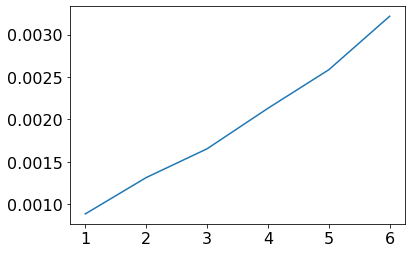

In [36]:
plt.plot(total_search_complexity_mean['Time'], '-')
plt.show()

### Query Tree Generation Time v/s Word Count

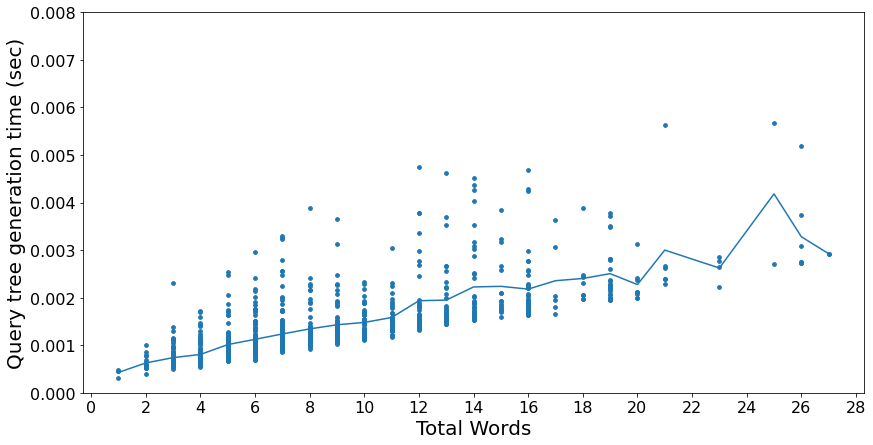

In [38]:
fig=plt.figure(figsize=(14,7), facecolor='w', edgecolor='k')
plt.scatter(result['Word_Count'], result['Time'],s = 14)
plt.plot(total_words_mean['Time'], '-')
plt.xlabel('Total Words', fontsize=20)
plt.ylabel('Query tree generation time (sec)', fontsize=20)
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
# plt.title('QT Gen Time v/s Word Count', fontsize=13)
plt.ylim(0.00, 0.008)
plt.xticks(np.arange(0,29,2), np.arange(0,29,2))
# plt.grid()
plt.show() 

### Query Tree Generation Time v/s Query Complexity

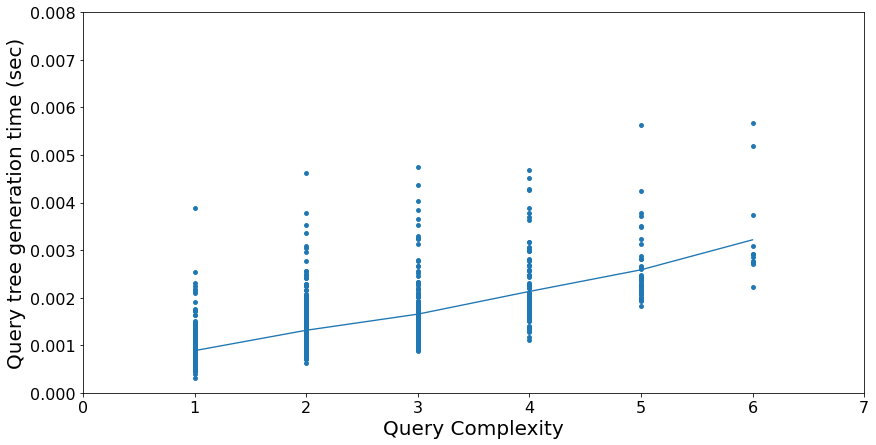

In [43]:
fig=plt.figure(figsize=(14,7), facecolor='w', edgecolor='k')
plt.plot(total_search_complexity_mean['Time'] , linewidth=1.35)
plt.scatter(result['Complexity'], result['Time'], s = 15)

plt.xlabel('Query Complexity',fontsize=20)
plt.ylabel('Query tree generation time (sec)',fontsize=20)
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
# plt.title('QT Gen Time v/s Complexity',fontsize=13)
plt.ylim(0.00, 0.008)
plt.xticks(np.arange(0,8,1), np.arange(0,8,1))
# plt.grid()
plt.show() 

### Maximum Time Taken

In [44]:
result['Time'].max()

0.005666